In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import os

In [7]:
# 读取文件数据
def read_G(your_name):
    GD = []
    GP = []

    f_P = open(f"{your_name}-GP.txt", 'r')
    f_D = open(f"{your_name}-GD.txt", 'r')
    for each_P in f_P:
        GP.append(float(each_P.replace('\n', '')))
    for each_D in f_D:
        GD.append(float(each_D.replace('\n', '')))
    
    return np.array(GP), np.array(GD)
# 进行拟合
def my_fit(your_name, save=False):
    
    GP_ori, GD_ori = read_G(your_name)

    # 归一化方法1：
    # GP_nor = GP_ori/max(GP_ori)
    # GD_nor = GD_ori/max(GD_ori)

    # 归一化方法2：
    GP_nor = (GP_ori-min(GP_ori))/(max(GP_ori)-min(GP_ori))
    GD_nor = (GD_ori-min(GD_ori))/(max(GD_ori)-min(GD_ori))

    P = np.arange(1, int(len(GP_ori)), 1)

    GPmax = max(GP_nor)
    GPmin = min(GP_nor)
    GDmax = max(GD_nor)
    GDmin = min(GD_nor)
    xP = GP_nor[:-1]
    yP = GP_nor[1:]
    xD = GD_nor[:-1]
    yD = GD_nor[1:]

    # 电导拟合公式 其中aP，aD为拟合参数，bP与bD为非线性度
    def delt_GP(xP, aP, bP):
        yP = xP + aP * np.exp(-bP * ((xP - GPmin) / (GPmax - GPmin)))
        return yP
    def delt_GD(xD, aD, bD):
        yD = xD - aD * np.exp(-bD * ((GDmax - xD) / (GDmax - GDmin)))
        return yD

    # 电导数据拟合
    np.random.seed(0)
    def curve_fit_GP(P, xP, yP, your_name, save=False, save_name='-GP'):
        # yP 段拟合数据
        while True:
            err_stdev = 0 # 0.2
            yP_noise = err_stdev * np.random.normal(size=yP.size)
            yP_data = yP + yP_noise
            popt, pcov = curve_fit(delt_GP, xP, yP_data)#训练函数
            aP = popt[0]
            bP = popt[1]
            if bP < 0:
                continue
            else:
                break
        yPvals=delt_GP(xP, aP, bP)
        plt.plot(P, yP, '*',label='original values')
        plt.plot(P, yPvals, 'r',label='curve_fit values')
        plt.ylim(0, 1)
        plt.xlabel('P axis')
        plt.ylabel('GP axis')
        plt.legend(loc=4)
        plt.title(f"{your_name} curve_fit aP = %0.2f, bP = %0.2f" %(aP, bP))
        if save:
            plt.savefig(your_name + save_name + '.png', dpi=720)
            np.savetxt(your_name + save_name + '.txt', yPvals)
            print("GP-拟合图象与拟合数据已保存！")
        plt.show()
        return None
    def curve_fit_GD(P, xD, yD, your_name, save=False, save_name='-GD'):
        # yD 段拟合数据
        while True:
            err_stdev = 0 # 0.2
            yD_noise = err_stdev * np.random.normal(size=xD.size)
            yD_data = yD + yD_noise
            popt, pcov = curve_fit(delt_GD, xD, yD_data)#训练函数
            aD = popt[0]
            bD = popt[1]
            if bD < 0:
                continue
            else:
                break
        yDvals=delt_GD(xD, aD, bD)
        plt.plot(P, yD, '*',label='original values')
        plt.plot(P, yDvals, 'r',label='curve_fit values')
        plt.ylim(0,1)
        plt.xlabel('P axis')
        plt.ylabel('GD axis')
        plt.legend(loc=3)
        plt.title(f"{your_name} curve_fit aD = %0.2f, bD = %0.2f" %(aD, bD))
        if save:
            plt.savefig(your_name + save_name + '.png', dpi=720)
            np.savetxt(your_name + save_name + '.txt', yDvals)
            print("GD-拟合图象与拟合数据已保存！")
        plt.show()
        return None


    if save:
        np.savetxt(f"{your_name}-GP_nor.txt", GP_nor)
        np.savetxt(f"{your_name}-GD_nor.txt", GD_nor)
        print("归一化电导数据已保存！")

    curve_fit_GP(P, xP, yP, your_name, save)
    curve_fit_GD(P, xD, yD, your_name, save)
    return None

# 主函数
def main(save):
    your_name = input("请输入你的文件标识(如: 张三的'zs'))")
    my_fit(your_name, save)
    print("请自行记录下图片中拟合参数的数值！")

归一化电导数据已保存！
GP-拟合图象与拟合数据已保存！


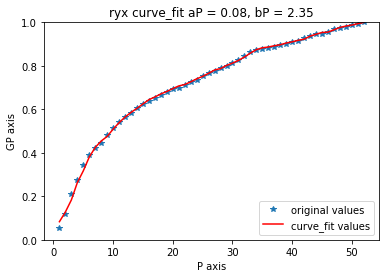

GD-拟合图象与拟合数据已保存！


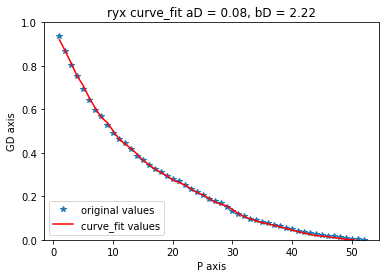

请自行记录下图片中拟合参数的数值！


In [8]:
main(save=True)